In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
# Load Data
data = pd.read_csv('final_cohort.csv')

In [55]:
data = data.dropna()

In [23]:
list(data)

['subject_id',
 'hadm_id',
 'stay_id',
 'charttime',
 'creat_low_past_7day',
 'creat_low_past_48hr',
 'creat',
 'aki_stage_creat',
 'uo_rt_6hr',
 'uo_rt_12hr',
 'uo_rt_24hr',
 'aki_stage_uo',
 'aki_stage',
 'admittime',
 'dischtime',
 'deathtime',
 'admission_type',
 'admission_location',
 'discharge_location',
 'insurance',
 'language',
 'marital_status',
 'race',
 'edregtime',
 'edouttime',
 'hospital_expire_flag',
 'gender',
 'anchor_age',
 'anchor_year',
 'anchor_year_group',
 'dod',
 'first_careunit',
 'last_careunit',
 'intime_x',
 'outtime',
 'los',
 'creat_24',
 'urine_24',
 'nanmin_valuenum_Albumin',
 'nanmin_valuenum_Bicarbonate',
 'nanmin_valuenum_Calculated Bicarbonate, Whole Blood',
 'nanmin_valuenum_Creatinine',
 'nanmin_valuenum_Hematocrit',
 'nanmin_valuenum_Hematocrit, Calculated',
 'nanmin_valuenum_Potassium',
 'nanmin_valuenum_Potassium, Whole Blood',
 'nanmin_valuenum_Urea Nitrogen',
 'nanmin_valuenum_pH',
 'nanmax_valuenum_Albumin',
 'nanmax_valuenum_Bicarbonate',


In [24]:
data.shape

(10192, 82)

In [38]:
columns = [
 'min_spo2',
 'max_spo2',
'nanmin_valuenum_Albumin',
 'nanmin_valuenum_Creatinine',
 'nanmin_valuenum_Hematocrit',
 'nanmin_valuenum_Potassium',
 'nanmin_valuenum_Potassium, Whole Blood',
 'nanmin_valuenum_Urea Nitrogen',
 'nanmin_valuenum_pH',
 'nanmax_valuenum_Albumin',
 'nanmax_valuenum_Creatinine',
 'nanmax_valuenum_Hematocrit',
 'nanmax_valuenum_Hematocrit, Calculated',
 'nanmax_valuenum_Potassium',
 'nanmax_valuenum_Potassium, Whole Blood',
 'nanmax_valuenum_Urea Nitrogen',
 'nanmax_valuenum_pH',
'CKD' ,                                                     
  'DM',                                                    
 'Hypertension',                                     
 'Heart Failure'

]
categorical = ['CKD' ,                                                     
  'DM',                                                    
 'Hypertension',                                     
 'Heart Failure'
]

numerical = [x for x in columns if x not in categorical]

In [39]:
sc = StandardScaler()
oh = OneHotEncoder()

In [40]:
X = data[columns]
y = np.array(data[['crrt']]).ravel()

In [58]:
X = X.fillna(-1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [60]:
X_num_train = sc.fit_transform(X_train[numerical])
X_num_test = sc.transform(X_test[numerical])
X_cat_train = X_train[categorical]
X_cat_test = X_test[categorical]

In [61]:
X_num_test.shape

(3058, 17)

In [62]:
X_train_proc = np.hstack((X_num_train, X_cat_train))
X_test_proc = np.hstack((X_num_test, X_cat_test))

In [63]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')

In [64]:
clf.fit(X_train_proc, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [65]:
yHat = clf.predict_proba(X_test_proc)

(array([982., 729., 325., 232., 161., 118.,  98., 119., 135., 159.]),
 array([6.73982874e-04, 1.00604710e-01, 2.00535438e-01, 3.00466166e-01,
        4.00396893e-01, 5.00327621e-01, 6.00258348e-01, 7.00189076e-01,
        8.00119804e-01, 9.00050531e-01, 9.99981259e-01]),
 <BarContainer object of 10 artists>)

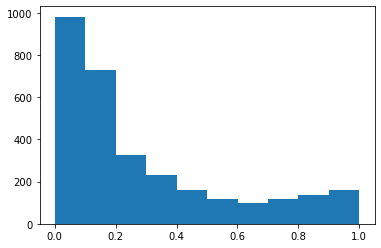

In [69]:
plt.hist(yHat[:, 1])

In [81]:
ypred = (yHat[:, 1] >= 0.5)

In [75]:
fpr, tpr, _ = roc_curve(y_test, yHat[:,1])
rocauc = auc(fpr, tpr)

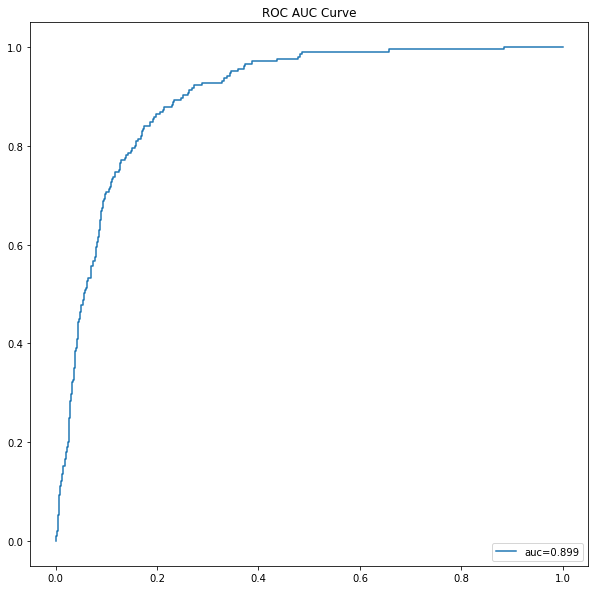

In [86]:

plt.figure(figsize=(10, 10))
plt.title('ROC AUC Curve')
plt.plot(fpr, tpr, label=f'auc={round(rocauc, 3)}')
plt.legend(loc=4)

In [83]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      2853
         1.0       0.26      0.81      0.40       205

    accuracy                           0.84      3058
   macro avg       0.62      0.82      0.65      3058
weighted avg       0.94      0.84      0.87      3058

